In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
df = pd.read_csv('creditcard.csv.zip')

In [9]:
import zipfile

with zipfile.ZipFile('creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

df = pd.read_csv('data/creditcard.csv')

Class
0    284315
1       492
Name: count, dtype: int64


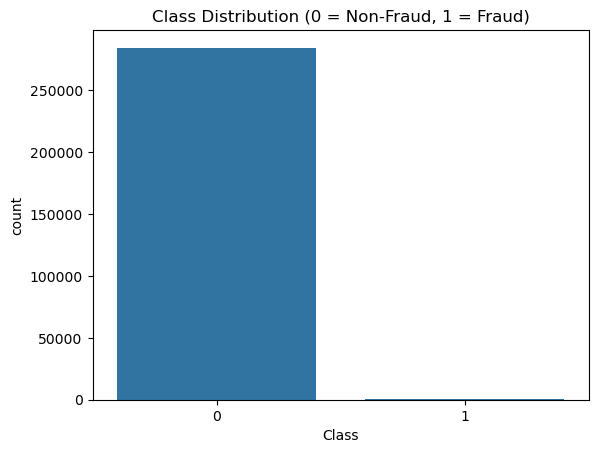

In [11]:
print(df['Class'].value_counts())

sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()

In [19]:
print(df.describe())

                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15  2.239053e-15   
std    1.332271e+00  1.237094e+00  1.194353e+00  1.

In [23]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))

print(f"Fraudulent transactions: {len(fraud)}")
print(f"Valid transactions: {len(valid)}")
print(f"Outlier Fraction: {outlierFraction}")

Fraudulent transactions: 492
Valid transactions: 284315
Outlier Fraction: 0.0017304750013189597


In [27]:
print("Amount details of the fraudulent transaction")

Amount details of the fraudulent transaction


In [31]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count    492.000000
mean       0.135382
std        1.026242
min       -0.353229
25%       -0.349231
50%       -0.316247
75%        0.070128
max        8.146182
Name: Amount, dtype: float64

In [35]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         -0.000234
std           0.999942
min          -0.353229
25%          -0.330640
50%          -0.265271
75%          -0.045177
max         102.362243
Name: Amount, dtype: float64

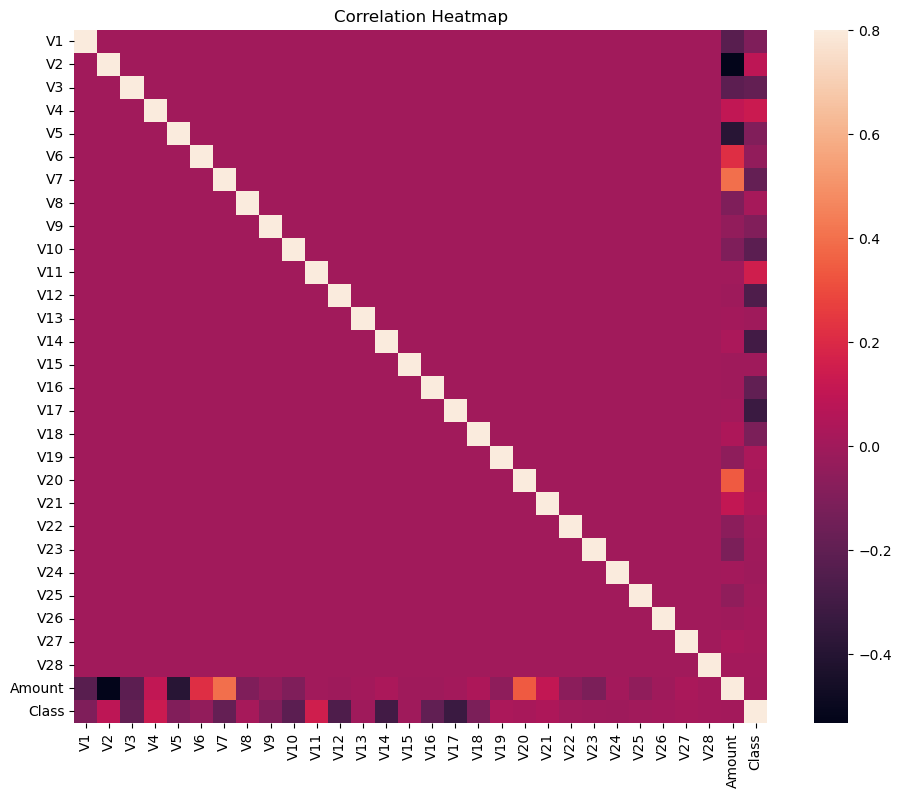

In [39]:
corrmat = df.corr()
fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.title("Correlation Heatmap")
plt.show()

In [43]:
X = df.drop(['Class'], axis=1)
Y = df['Class']
print(X.shape)

(284807, 29)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

In [ ]:
from sklearn.impute import SimpleImputer
print("NaN values in yTest before imputation:", np.isnan(yTest).sum())

imputer = SimpleImputer(strategy='most_frequent')  
yTest = imputer.fit_transform(yTest.reshape(-1, 1)).flatten()
print("NaN values in yTest after imputation:", np.isnan(yTest).sum())

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

accuracy = accuracy_score(y_test, yPred)
precision = precision_score(y_test, yPred)
recall = recall_score(y_test, yPred)
f1 = f1_score(y_test, yPred)
mcc = matthews_corrcoef(y_test, yPred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)

cm = confusion_matrix(y_test, yPred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9996254813150287
Precision: 0.940677966101695
Recall: 0.8161764705882353
F1 Score: 0.8740157480314961
Matthews Correlation Coefficient: 0.8760381955213625
Confusion Matrix:
 [[85300     7]
 [   25   111]]
